### 导入必要的包

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


tf.__version__

'2.0.0'

## 多层神经网络

### 数据预处理

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
total_num = len(train_images)
valid_split = 0.2
train_num = int(total_num * (1 - valid_split))

train_x = train_images[:train_num]
train_y = train_labels[:train_num]

valid_x = train_images[train_num:]
valid_y = train_labels[train_num:]

test_x = test_images
test_y = test_labels

In [4]:
train_x = train_x.reshape(-1, 784)
valid_x = valid_x.reshape(-1, 784)
test_x = test_x.reshape(-1, 784)

In [5]:
train_x = tf.cast(train_x / 255.0, tf.float32)
valid_x = tf.cast(valid_x / 255.0, tf.float32)
test_x = tf.cast(test_x / 255.0, tf.float32)

train_y = tf.one_hot(train_y, depth=10)
valid_y = tf.one_hot(valid_y, depth=10)
test_y = tf.one_hot(test_y, depth=10)

### 创建变量

In [6]:
Input_dim = 784
H1_NN = 64
W1 = tf.Variable(tf.random.normal([Input_dim, H1_NN], mean=0.0, stddev=1.0, dtype=tf.float32))
B1 = tf.Variable(tf.zeros([H1_NN]), dtype=tf.float32)

H2_NN = 32
W2 = tf.Variable(tf.random.normal([H1_NN, H2_NN], mean=0.0, stddev=1.0, dtype=tf.float32))
B2 = tf.Variable(tf.zeros([H2_NN]), dtype=tf.float32)

H3_NN = 10
W3 = tf.Variable(tf.random.normal([H2_NN, H3_NN], mean=0.0, stddev=1.0, dtype=tf.float32))
B3 = tf.Variable(tf.zeros([10]), dtype=tf.float32)

### 建立待优化列表

In [7]:
W = [W1, W2, W3]
B = [B1, B2, B3]

### 模型建立

In [8]:
def model(x, w, b):
    x = tf.matmul(x, w[0] + b[0])
    x = tf.nn.relu(x)
    x = tf.matmul(x, w[1] + b[1])
    x = tf.nn.relu(x)
    x = tf.matmul(x, w[2] + b[2])
    pred = tf.nn.softmax(x)
    
    return pred

### 定义损失函数

In [9]:
def loss(x, y, w, b):
    pred = model(x, w, b)
    loss_ = tf.keras.losses.categorical_crossentropy(y_true=y, y_pred=pred)
    return tf.reduce_mean(loss_)

### 定义梯度下降

In [10]:
def grad(x, y, w, b):
    var_list = w + b
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, var_list)

### 设置训练参数

In [11]:
epochs = 400
batch_size = 50
learning_rate = 0.001

### 定义优化器

In [12]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

### 定义准确率

In [13]:
def accuracy(x, y, w, b):
    pred = model(x, w, b)
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
total_step = int(train_num / batch_size)

loss_list_train = []
loss_list_valid = []
acc_list_train = []
acc_list_valid = []

for epoch in range(epochs):
    if epoch > 10:   
        learning_rate = 0.00001 
    for step in range(total_step):
        xs = train_x[step * batch_size:(step + 1) * batch_size]
        ys = train_y[step * batch_size:(step + 1) * batch_size]
        
        grads = grad(xs, ys, W, B)
        optimizer.apply_gradients(zip(grads, W + B))
    loss_train = loss(train_x, train_y, W, B).numpy()
    loss_valid = loss(valid_x, valid_y, W, B).numpy()
    acc_train = accuracy(train_x, train_y, W, B).numpy()
    acc_valid = accuracy(valid_x, valid_y, W, B).numpy()
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    acc_list_train.append(acc_train)
    acc_list_valid.append(acc_valid)
    print('Epoch: {:03}'.format(epoch + 1),
          'train_loss= %.6f' % loss_train,
          'train_acc=%.6f' % acc_train,
          'val_loss= %.6f' % loss_valid,
          'val_acc=%.6f' % acc_valid,
          'learning_rate=%.6f' % learning_rate)
print('INFO:Train Finished!')

Epoch: 001 train_loss= 6.804303 train_acc=0.567979 val_loss= 6.769920 val_acc=0.571167 learning_rate=0.001000
Epoch: 002 train_loss= 6.126986 train_acc=0.613604 val_loss= 6.156003 val_acc=0.612000 learning_rate=0.001000
Epoch: 003 train_loss= 5.868060 train_acc=0.631354 val_loss= 5.914011 val_acc=0.628167 learning_rate=0.001000
Epoch: 004 train_loss= 5.616409 train_acc=0.647771 val_loss= 5.690442 val_acc=0.643167 learning_rate=0.001000
Epoch: 005 train_loss= 5.471682 train_acc=0.657438 val_loss= 5.589630 val_acc=0.650333 learning_rate=0.001000
Epoch: 006 train_loss= 5.386223 train_acc=0.662958 val_loss= 5.499886 val_acc=0.655667 learning_rate=0.001000
Epoch: 007 train_loss= 5.385835 train_acc=0.663125 val_loss= 5.483840 val_acc=0.656917 learning_rate=0.001000
Epoch: 008 train_loss= 5.325708 train_acc=0.667000 val_loss= 5.425380 val_acc=0.660833 learning_rate=0.001000
Epoch: 009 train_loss= 5.300063 train_acc=0.668479 val_loss= 5.392279 val_acc=0.662667 learning_rate=0.001000
Epoch: 010

Epoch: 076 train_loss= 2.196177 train_acc=0.861792 val_loss= 2.347700 val_acc=0.852083 learning_rate=0.000010
Epoch: 077 train_loss= 2.164433 train_acc=0.863729 val_loss= 2.332640 val_acc=0.852917 learning_rate=0.000010
Epoch: 078 train_loss= 2.202991 train_acc=0.860875 val_loss= 2.363327 val_acc=0.851000 learning_rate=0.000010
Epoch: 079 train_loss= 2.129464 train_acc=0.866271 val_loss= 2.295933 val_acc=0.854667 learning_rate=0.000010
Epoch: 080 train_loss= 2.146953 train_acc=0.865000 val_loss= 2.291079 val_acc=0.855917 learning_rate=0.000010
Epoch: 081 train_loss= 2.126771 train_acc=0.866083 val_loss= 2.283351 val_acc=0.855833 learning_rate=0.000010
Epoch: 082 train_loss= 2.136980 train_acc=0.865250 val_loss= 2.319687 val_acc=0.854083 learning_rate=0.000010
Epoch: 083 train_loss= 2.143199 train_acc=0.864917 val_loss= 2.308061 val_acc=0.853750 learning_rate=0.000010
Epoch: 084 train_loss= 2.069162 train_acc=0.869854 val_loss= 2.250002 val_acc=0.858667 learning_rate=0.000010
Epoch: 085

Epoch: 151 train_loss= 0.540667 train_acc=0.964354 val_loss= 0.772018 val_acc=0.949583 learning_rate=0.000010
Epoch: 152 train_loss= 0.474870 train_acc=0.969042 val_loss= 0.737585 val_acc=0.952083 learning_rate=0.000010
Epoch: 153 train_loss= 0.453052 train_acc=0.970333 val_loss= 0.704540 val_acc=0.954500 learning_rate=0.000010
Epoch: 154 train_loss= 0.510229 train_acc=0.966438 val_loss= 0.730274 val_acc=0.952333 learning_rate=0.000010
Epoch: 155 train_loss= 0.468518 train_acc=0.969354 val_loss= 0.710935 val_acc=0.953417 learning_rate=0.000010
Epoch: 156 train_loss= 0.473141 train_acc=0.968979 val_loss= 0.737285 val_acc=0.952250 learning_rate=0.000010
Epoch: 157 train_loss= 0.453784 train_acc=0.970104 val_loss= 0.697997 val_acc=0.954250 learning_rate=0.000010
Epoch: 158 train_loss= 0.417418 train_acc=0.972396 val_loss= 0.657825 val_acc=0.956667 learning_rate=0.000010
Epoch: 159 train_loss= 0.566127 train_acc=0.962604 val_loss= 0.772407 val_acc=0.949000 learning_rate=0.000010
Epoch: 160

Epoch: 226 train_loss= 0.275468 train_acc=0.982063 val_loss= 0.573077 val_acc=0.962917 learning_rate=0.000010
Epoch: 227 train_loss= 0.295115 train_acc=0.980542 val_loss= 0.569155 val_acc=0.963083 learning_rate=0.000010
Epoch: 228 train_loss= 0.282192 train_acc=0.981604 val_loss= 0.604206 val_acc=0.960417 learning_rate=0.000010
Epoch: 229 train_loss= 0.243793 train_acc=0.984271 val_loss= 0.548016 val_acc=0.964000 learning_rate=0.000010
Epoch: 230 train_loss= 0.246808 train_acc=0.983979 val_loss= 0.563213 val_acc=0.963500 learning_rate=0.000010
Epoch: 231 train_loss= 0.234726 train_acc=0.984542 val_loss= 0.550772 val_acc=0.964083 learning_rate=0.000010
Epoch: 232 train_loss= 0.256063 train_acc=0.983229 val_loss= 0.548403 val_acc=0.964583 learning_rate=0.000010
Epoch: 233 train_loss= 0.269243 train_acc=0.982125 val_loss= 0.586497 val_acc=0.961750 learning_rate=0.000010
Epoch: 234 train_loss= 0.263041 train_acc=0.982562 val_loss= 0.541277 val_acc=0.964750 learning_rate=0.000010
Epoch: 235

Epoch: 301 train_loss= 0.281357 train_acc=0.981687 val_loss= 0.637088 val_acc=0.958333 learning_rate=0.000010
Epoch: 302 train_loss= 0.246909 train_acc=0.983958 val_loss= 0.538487 val_acc=0.964833 learning_rate=0.000010
Epoch: 303 train_loss= 0.260758 train_acc=0.982771 val_loss= 0.567468 val_acc=0.963250 learning_rate=0.000010
Epoch: 304 train_loss= 0.201797 train_acc=0.986917 val_loss= 0.507419 val_acc=0.967167 learning_rate=0.000010
Epoch: 305 train_loss= 0.215556 train_acc=0.985896 val_loss= 0.551495 val_acc=0.964333 learning_rate=0.000010
Epoch: 306 train_loss= 0.212396 train_acc=0.986188 val_loss= 0.540222 val_acc=0.965083 learning_rate=0.000010
Epoch: 307 train_loss= 0.267768 train_acc=0.982250 val_loss= 0.587141 val_acc=0.961250 learning_rate=0.000010
Epoch: 308 train_loss= 0.228363 train_acc=0.985229 val_loss= 0.522741 val_acc=0.966083 learning_rate=0.000010
Epoch: 309 train_loss= 0.226937 train_acc=0.985167 val_loss= 0.560838 val_acc=0.963750 learning_rate=0.000010
Epoch: 310

Epoch: 376 train_loss= 0.166983 train_acc=0.989125 val_loss= 0.507421 val_acc=0.967333 learning_rate=0.000010
Epoch: 377 train_loss= 0.167355 train_acc=0.989271 val_loss= 0.511829 val_acc=0.966917 learning_rate=0.000010
Epoch: 378 train_loss= 0.171925 train_acc=0.988750 val_loss= 0.520892 val_acc=0.965833 learning_rate=0.000010
Epoch: 379 train_loss= 0.165334 train_acc=0.989354 val_loss= 0.512836 val_acc=0.966583 learning_rate=0.000010
Epoch: 380 train_loss= 0.163936 train_acc=0.989479 val_loss= 0.480753 val_acc=0.968667 learning_rate=0.000010
Epoch: 381 train_loss= 0.222664 train_acc=0.984979 val_loss= 0.571479 val_acc=0.962583 learning_rate=0.000010
Epoch: 382 train_loss= 0.193336 train_acc=0.987521 val_loss= 0.521553 val_acc=0.966417 learning_rate=0.000010
Epoch: 383 train_loss= 0.157278 train_acc=0.989875 val_loss= 0.493450 val_acc=0.967917 learning_rate=0.000010
Epoch: 384 train_loss= 0.149343 train_acc=0.990354 val_loss= 0.482244 val_acc=0.968583 learning_rate=0.000010
Epoch: 385

### 损失率与准确率可视化

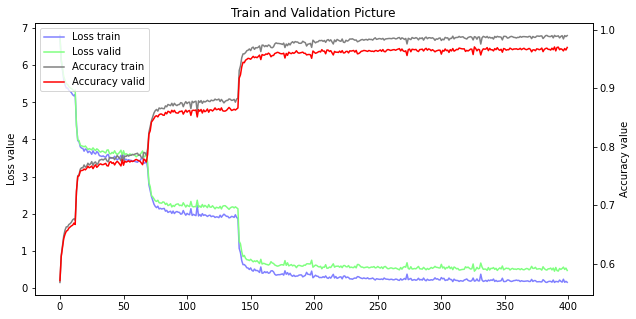

In [15]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(111)
ax1.set_title('Train and Validation Picture')
ax1.set_ylabel('Loss value')
line1, = ax1.plot(loss_list_train, color=(0.5, 0.5, 1.0), label='Loss train')
line2, = ax1.plot(loss_list_valid, color=(0.5, 1.0, 0.5), label='Loss valid')
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy value')
line3, = ax2.plot(acc_list_train, color=(0.5, 0.5, 0.5), label='Accuracy train')
line4, = ax2.plot(acc_list_valid, color=(1, 0, 0), label='Accuracy valid')
plt.legend(handles=(line1, line2, line3, line4), loc='best')
plt.show()

### 模型评估

In [16]:
acc_test = accuracy(test_x, test_y, W, B).numpy()
print('Test Accuracy:', acc_test)

Test Accuracy: 0.9694
